# COGS 108 - Final Project 

# Overview 

Our research examines whether race affects the outcome of a police stop, and more broadly if racial discrimination exists in the city of San Diego. Using logistic regression models and the Chi Square Test of Independence, we were able to determine that race is a predictor of whether action is taken against an individual for certain reasons for police stops, such as traffic violations and truancies. However, for other reasons, race did not predict the outcome of a police stop.

# Names

- Susanna Anil
- Sahithi Chimmula
- Reshma Karthikeyan
- Shagun Khare
- Pooja Pathak

# Research Question

Is racial discrimination by law enforcement prevalent in San Diego, and how, if at all, does race affect the outcome of a police stop?

# Background and Prior Work

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; There have been multiple studies conducted studying the effect of race and attitudes towards police and police attitudes towards detainees. A cumulative paper detailed the conclusion of such studies by stating that although the gender and race of the detainee factor into police stress, work environment and home related issues play a bigger role on their behavior (He, Zhao, Ren). Many studies also stated that there is a distinct racial gap between the public’s attitude towards police with African Americans having a relatively less positive attitude in comparison to White Americans (Eschholz, Blackwell, Gertz, Chiricos). Blackwell’s study, like many others, only studied a sample space consisting of White Americans and African Americans. One such study stated “The probability of being black, unarmed and shot by police is about 3.5 times the probability of being white, unarmed and shot by police” (Ross, 2015).  Studies like the aforementioned fall short as they didn’t study the relations between police and other racial groups. The incentive for these studies to do so could stem from the media's influence on the public’s view of the police. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The media has generally portrayed adverse relations between African Americans and police as a result of unequal police brutality. NIJ even claimed, "African-Americans who live in high-crime areas and who regularly hear others talk about police misconduct are especially likely to believe misconduct is common." Conversely, police depend on the cooperation of the public in order to complete their duties properly. As a result, it creates a cycle between the media disproportionately displaying negative police attitudes towards racial groups and consequently the public loses faith in the police. Our goal is to determine if this notion has truth behind it and race, in fact, does have an effect on the behavior of police.


References (include links):

- 1) Eschholz, Sarah, et al. “Race and Attitudes toward the Police: Assessing the Effects of Watching ‘Reality’ Police Programs.” Journal of Criminal Justice, Pergamon, 27 Mar. 2002, www.sciencedirect.com/science/article/pii/S0047235202001332.

- 2) He, Ni, et al. “Do Race and Gender Matter in Police Stress? A Preliminary Assessment of the Interactive Effects.” Journal of Criminal Justice, Pergamon, 28 Sept. 2005,
www.sciencedirect.com/science/article/pii/S0047235205000590.
- 3) “Perceptions of Treatment by Police: Impacts of Personal Interactions and the Media.” National Institute of Justice, U.S. Department of Justice, 17 Mar. 2014, nij.ojp.gov/topics/articles/perceptions-treatment-police-impacts-personal-interactions-and-media.
- 4) “San Diego, CA Crime Rates.” NeighborhoodScout, CoreLogic, www.neighborhoodscout.com/ca/san-diego/crime.



# Model Research


- Logistic Regression: statistical model that utilizes the logistic function to model a binary dependent variable. 
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    - https://www.youtube.com/watch?v=zM4VZR0px8E
- Heatmap: representation of data to represent the correlation between variables. 
    - https://seaborn.pydata.org/generated/seaborn.heatmap.html
    - https://stackoverflow.com/questions/55312548/create-a-heatmap-of-two-categorical-variables
- Chi-squared test: determines whether there is a relationship between categorical variables.
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
    - https://stattrek.com/chi-square-test/independence.aspx
    - http://www.statstutor.ac.uk/resources/uploaded/tutorsquickguidetostatistics.pdf



# Hypothesis


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Based on media coverage (especially what is shown in the news) and previous studies as mentioned above, we believe that race does play a factor in the outcome of charges from the police. More specifically, the result of the misdemeanor may not accurately reflect the severity of the offense committed because race played a factor in the outcome. 

# Dataset(s)

### 1. Police Stop - Basic Information

- This dataset includes all the police stops in San Diego from April 2019 to May 2020.
-  Link to dataset: https://data.sandiego.gov/datasets/police-ripa-stops/?fbclid=IwAR1GexpxU944u1UpKwulxAWFWrlYXzStxp5195Rfeqt-q7SbJRVew0YvGQQ
- Number of observations: 276736
- Column(s) used from dataset: 
    - stop_id: unique identifier for stop

### 2. Police Stop - Race of Persons Stopped

- This dataset includes the race of all the detainees.
- Link to dataset: https://data.sandiego.gov/datasets/police-ripa-race/
- Number of observations: 338202
- Column(s) used from dataset:
    - stop_id: unique identifier for stop
    - race: perceived race per person stopped by police

### 3. Police Stop - Result of Stop

- This dataset includes the result from each of the stops.
- Link to dataset: https://data.sandiego.gov/datasets/police-ripa-stop-result/
- Number of observations: 509783
- Column(s) used from dataset:
    - stop_id: unique identifier for stop
    - result: outcome(s) of a stop for a person stopped by SDPD

### 4. Police Stop - Reason for Stop

- This dataset includes the reason for each of the stops.
- Link to dataset: https://data.sandiego.gov/datasets/police-ripa-stop-reason/
- Number of observations: 344877
- Column(s) used from dataset:
    - stop_id: unique identifier for stop
    - reason: the primary reason a person was stopped by the SDPD

# Setup

In [1]:
# Imports
# 
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning

In [2]:
#Read in data from SD.gov website
df_stop = pd.read_csv("http://seshat.datasd.org/pd/ripa_stops_datasd_v1.csv")
df_race = pd.read_csv("http://seshat.datasd.org/pd/ripa_race_datasd.csv")
df_action = pd.read_csv("http://seshat.datasd.org/pd/ripa_actions_taken_datasd.csv")
df_reason = pd.read_csv("http://seshat.datasd.org/pd/ripa_stop_reason_datasd.csv")

We were able to directly read in the data from the San Diego Government website because the website stored its data as comma delimited csv files. We stored the data into dataframes.

In [3]:
#Extract necessary columns 
stop_list = ["stop_id"]
df_stop = df_stop[stop_list]
race_list = ["stop_id","race"]
df_race = df_race[race_list]
action_list = ["stop_id","action"]
df_action = df_action[action_list]
reason_list = ["stop_id","reason_for_stop"]
df_reason = df_reason[reason_list]

We extracted the necessary columns from each of the dataframes which contained extraneous information not needed for our analysis. 

In [4]:
#Merge all 4 dataframes together, deleting duplicate rows as we merge

df = pd.merge(df_stop, df_race, how = 'inner',on='stop_id')
df = pd.merge(df,df_reason, how = 'inner',on='stop_id')
df = df.drop_duplicates()
df = pd.merge(df,df_action, how = 'inner',on='stop_id')
df = df.drop_duplicates()

We merged the four dataframes together into one cumulative dataframe that included information on the stop id, reason for the stop, the action that was taken, and the perceived race of the detainee. 

In [5]:
#Set index for dataframe to be stop_id (unique identifier for each stop)
df.set_index("stop_id",inplace = True)

#Drop all rows with duplicate stop_ids keeping only the first
df = df[~df.index.duplicated()]

While examining our dataframe we noticed that there were multiple rows with dupilcate stop ids. This came as a result of having multiple actions taken against a detainee for a single stop. Consequently, we dropped all rows with a duplicate stop id. This doesn't affect our analysis as we normalize all our actions in the step below.

In order to avoid any bias about the severity of actions taken against detainees, we set the action of a specific stop id to be 0 if there was no action taken against them (represented as "None" in original data). Conversely, if there was any type of action (regardless of the severity), action was set to be 1.

In [6]:
#Normalize the action column (None = 0, anything else = 1)
df['action'].loc[df['action'] == 'None'] = 0
df['action'].loc[df['action'] != 0] = 1
df

,race,reason_for_stop,action
stop_id,,,
2443,White,Reasonable Suspicion,0
2444,White,Traffic Violation,0
2447,Hispanic/Latino/a,Reasonable Suspicion,1
2448,White,Traffic Violation,0
2449,White,Reasonable Suspicion,1
...,...,...,...
255143,Hispanic/Latino/a,Traffic Violation,0
255256,Middle Eastern or South Asian,Traffic Violation,0
255267,Asian,Reasonable Suspicion,1


 
The US Census groups South Asians and Pacific Islanders together with the Asian population. As a result, we combined those two races to be part of the "Asian" race. 

In [7]:
df.race[df.race == 'Asian'] = 'Asian'
df.race[df.race == 'Middle Eastern or South Asian'] = 'Asian'
df.race[df.race == 'Pacific Islander'] = 'Asian'
df.race[df.race == 'Hispanic/Latino/a'] = 'Hispanic'
df.race[df.race == 'Black/African American'] = 'Black'

In order to get an idea of the general trend of our data we decided to visualize the raw counts of each race broken into action and no action taken against them. 

Note: No action is resembled by a 0 and some type of action is resembled by a 1.

### Visualization/EDA

Text(0.5, 0, 'Count')

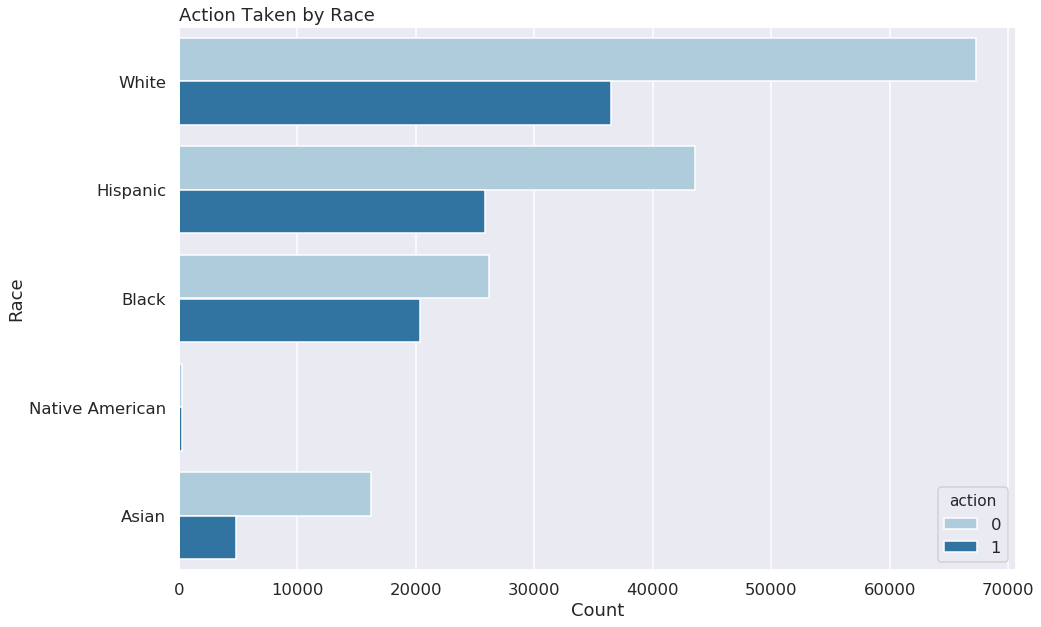

In [8]:
#Display summary data using raw counts
plt.rcParams['figure.figsize'] = (15, 10)
sns.set_palette("Paired")
ax = sns.countplot(y='race', hue='action', data=df)
ax.set_title('Action Taken by Race', loc = 'left')
ax.set_ylabel('Race')
ax.set_xlabel('Count')

We can see that a majority of people that were stopped were perceived to be white. However, most of them had no action taken against them while other people who were perceived to be a minority race (Hispanic/Latino/a or Black/African American) had a smaller disparity between those that had no action taken against them against those that did. To get a better picture, we decided to determine the proportion of detainees that had action taken against them against those that did not.

In [9]:
def calculateRaceProportion(df):
    df_prop = pd.DataFrame(df.groupby('race')['action'].sum()/df['race'].value_counts())
    df_prop.reset_index(level=0, inplace=True)
    df_prop.columns = ['race', 'proportion']
    
    return df_prop

The above function calculates the proportion of action taken for stops within each race. 

In [10]:
#store new df holding the proportion of action taken against a certain race vs those that did not
df_prop = calculateRaceProportion(df)
df_prop

,race,proportion
0,Asian,0.23
1,Black,0.44
2,Hispanic,0.37
3,Native American,0.46
4,White,0.35


In order to highlight the race with the highest proportion of action taken against them, that bar will be highlighted in purple.

Text(0.5, 0, 'Action')

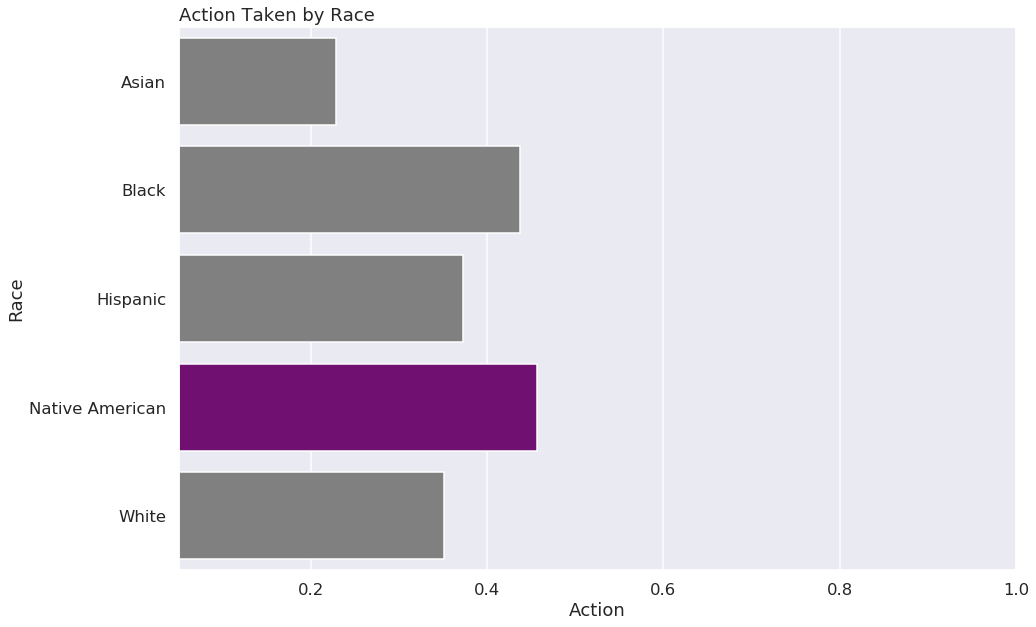

In [11]:
colorChoice = ['grey' if val < df_prop['proportion'].max() else 'purple' for val in df_prop['proportion'] ]
#create barplot
ax = sns.barplot(x='proportion', y='race', data=df_prop, palette = colorChoice)
ax.set_xlim(0.05, 1)

ax.set_title('Action Taken by Race', loc='left')
ax.set_ylabel('Race')

ax.set_xlabel('Action')

We see that Native Americans have the highest proportion of action taken against them vs. no action. Looking at the raw counts from the previous visualization however, we know that Native Americans make up the smallest percentage of the total population of our data.

In [12]:
df.groupby(['race', 'action']).size()

race             action
Asian            0         16250
                 1          4810
Black            0         26195
                 1         20327
Hispanic         0         43593
                 1         25872
Native American  0           278
                 1           234
White            0         67278
                 1         36453
dtype: int64

This table further confirms our statement. Native Americans make up the smallest portion of the population in San Diego. Therefore, despite having the highest proportion of action taken against them, they are not stopped as much as other races because of their already lower population count.

To further explore the data and determine if a confounding variable could be affecting the relationship between race and action we split the data apart into separate data frames based off of the reason for stop. 

In [13]:
#determine how many people are stopped for each reason
df.groupby(['reason_for_stop']).size()

reason_for_stop
Consensual Encounter resulting in a search                                                                             4472
Determine whether the student violated school policy                                                                     14
Investigation to determine whether the person was truant                                                               4282
Knowledge of outstanding arrest warrant/wanted person                                                                  2890
Known to be on Parole / Probation / PRCS / Mandatory Supervision                                                       3585
Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7         6
Reasonable Suspicion                                                                                                 116790
Traffic Violation                                                                                                   

After we determined that there were 8 reasons for stopping people, we noticed 2/8 of the reasons had less than 1% of the total number of observations and so have decided to omit them in future analyses.

In [14]:
df1 = df[df['reason_for_stop'] == "Consensual Encounter resulting in a search"]
df2 = df[df['reason_for_stop'] == 'Investigation to determine whether the person was truant']
df3 = df[df['reason_for_stop'] == 'Knowledge of outstanding arrest warrant/wanted person']
df4 = df[df['reason_for_stop'] == 'Known to be on Parole / Probation / PRCS / Mandatory Supervision']
df5 = df[df['reason_for_stop'] == 'Reasonable Suspicion']
df6 = df[df['reason_for_stop'] == 'Traffic Violation']

In [15]:
#Using the function we created above we determine the proportion of action taken against people vs no action
df1_prop = calculateRaceProportion(df1)
df1_prop

,race,proportion
0,Asian,0.47
1,Black,0.53
2,Hispanic,0.53
3,Native American,0.73
4,White,0.51


We continue to highlight the race with the highest proportion. 

Text(0.5, 0, 'Action')

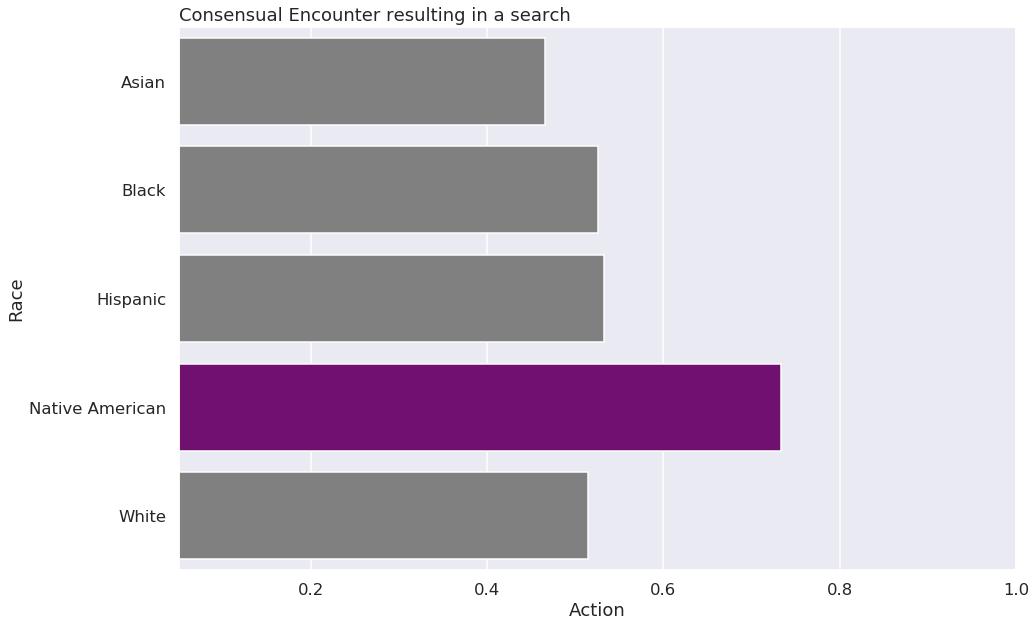

In [16]:
colorChoice = ['grey' if val < df1_prop['proportion'].max() else 'purple' for val in df1_prop['proportion'] ]
#create barplot
ax = sns.barplot(x='proportion', y='race', data=df1_prop, palette = colorChoice)
ax.set_xlim(0.05, 1)

ax.set_title('Consensual Encounter resulting in a search', loc='left')
ax.set_ylabel('Race')

ax.set_xlabel('Action')

The first graph shows that Native Americans report the highest proportion of consensual encounters resulting in a search after being stopped. However, we know from previous analysis that they make up the smallest percentage of the population. In fact, there are only 3 individuals, that were stopped as result of a consensual encounter resulting in a search, who were perceived to be Native American. Thus, the sample size of Native Americans makes it difficult to draw any accurate statistic conlusions. Therefore, we decide to use a secondary visualization to determine how the number of Native Americans have action taken against them compares against other races. 


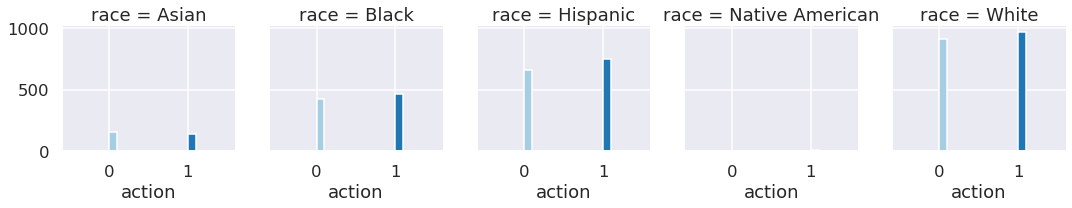

In [17]:
df1_facet = sns.FacetGrid(df1,col="race",hue='action',col_order=["Asian","Black","Hispanic","Native American","White"],size=3)
df1_facet = df1_facet.map(plt.hist, "action")

The facet graphs tell us that the white population holds the highest count of stops due to this reason. Moreover, Native Americans are stopped at such a small rate that their counts can't compare to the scale of the other races. 

We repeat this process for all five other reasons to determine which race had the highest proportion of action taken against them. 

Text(0.5, 0, 'Action')

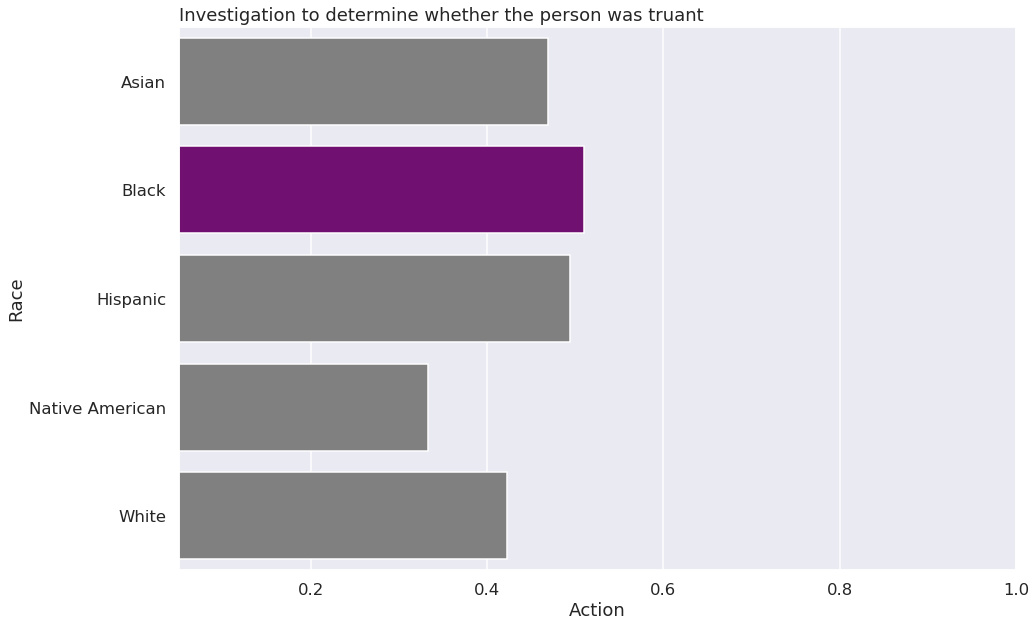

In [18]:
df2_prop = calculateRaceProportion(df2)
colorChoice = ['grey' if val < df2_prop['proportion'].max() else 'purple' for val in df2_prop['proportion'] ]
ax = sns.barplot(x='proportion', y='race', data=df2_prop, palette = colorChoice)
ax.set_xlim(0.05, 1)

ax.set_title('Investigation to determine whether the person was truant', loc='left')
ax.set_ylabel('Race')
ax.set_xlabel('Action')

Based off of the proportions, the Black population had a greater likelihood of having aciton taken against them for having an investigation to check whether the person was truant (also applies to students who have missed school for no valid reason). 

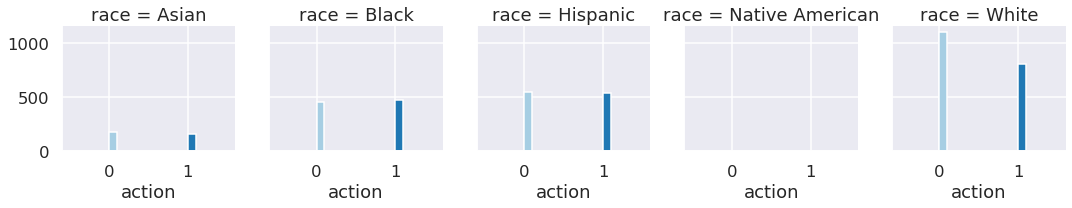

In [19]:
df2_facet = sns.FacetGrid(df2,col="race",hue='action',col_order=["Asian","Black","Hispanic","Native American","White"],size=3)
df2_facet = df2_facet.map(plt.hist, "action")

The information from the facet grids further confirms the conclusion drawn from the barplot. For this specific action, although the white population reported a higher count of stops, they were overwhelmingly less likely to have action taken against them. On the other hand, the Black population was about equally likely to have action taken against them as they were to have no action.

Text(0.5, 0, 'Action')

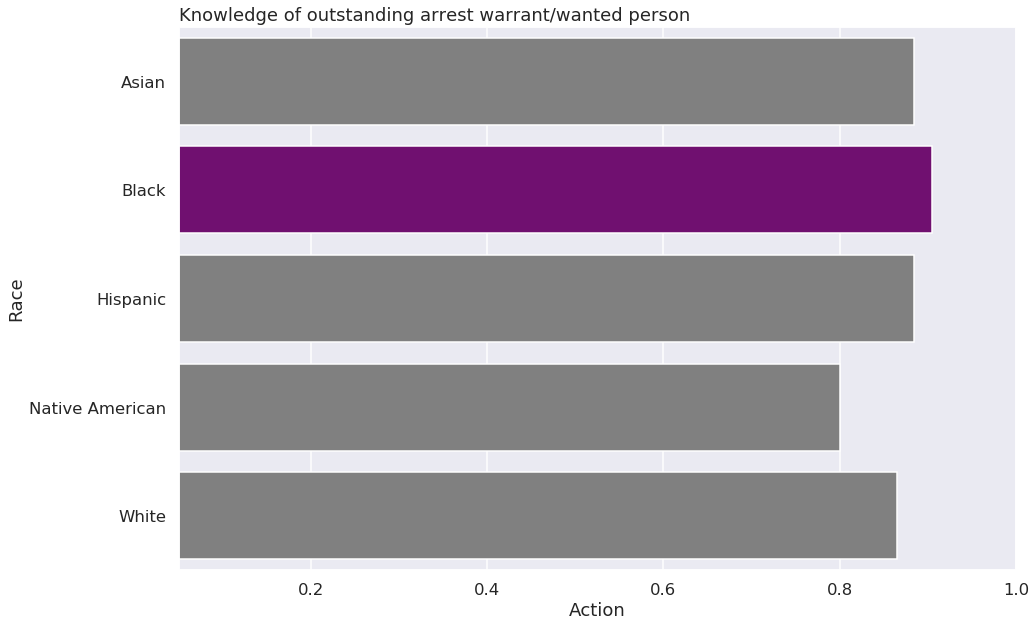

In [20]:
df3_prop = calculateRaceProportion(df3)
colorChoice = ['grey' if val < df3_prop['proportion'].max() else 'purple' for val in df3_prop['proportion'] ]
ax = sns.barplot(x='proportion', y='race', data=df3_prop, palette = colorChoice)
ax.set_xlim(0.05, 1)

ax.set_title('Knowledge of outstanding arrest warrant/wanted person', loc='left')
ax.set_ylabel('Race')
ax.set_xlabel('Action')

The black population had a greater share of action taken after a stop incurred because of an outstanding arrest warrant.

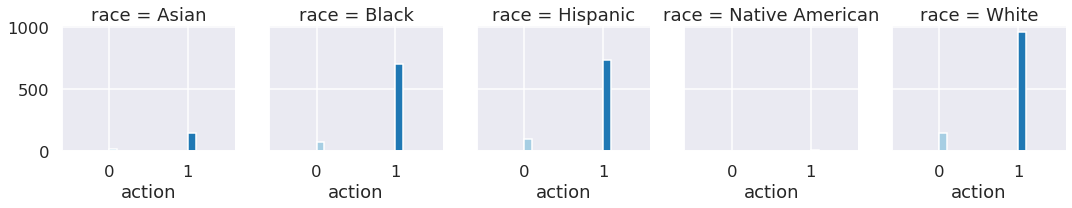

In [21]:
df3_facet = sns.FacetGrid(df3,col="race",hue='action',col_order=["Asian","Black","Hispanic","Native American","White"],size=3)
df3_facet = df3_facet.map(plt.hist, "action")

The white population reported a higher count of stops and presented a similar but slightly smaller share of action taken against them which we can see by the drastic difference between the bars for action taken (dark blue) and no action taken (light blue).

Text(0.5, 0, 'Action')

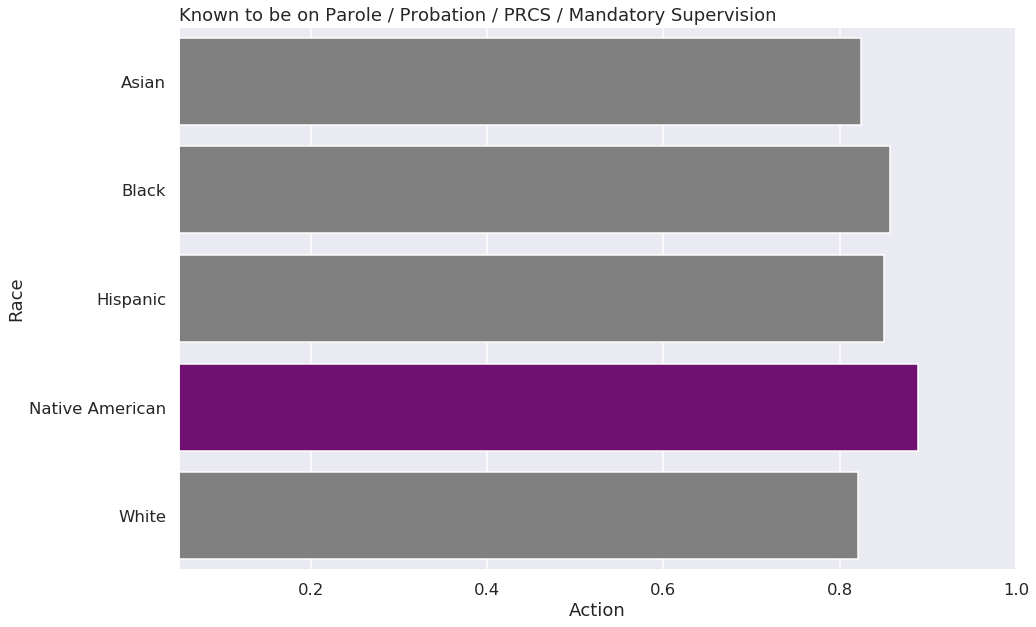

In [22]:
df4_prop = calculateRaceProportion(df4)

colorChoice = ['grey' if val < df4_prop['proportion'].max() else 'purple' for val in df4_prop['proportion'] ]
ax = sns.barplot(x='proportion', y='race', data=df4_prop, palette = colorChoice)
ax.set_xlim(0.05, 1)

ax.set_title('Known to be on Parole / Probation / PRCS / Mandatory Supervision', loc='left')
ax.set_ylabel('Race')
ax.set_xlabel('Action')

While Native Americans hold the highest proportion of action taken against them due to a stop conducted for said civilian to be on parole, as mentioned earlier, there is not a large enough sample size for Native Americans to draw any statistical conclusions from. Black individuals had the second highest proportion of action taken for this reason, followed closely by Hispanic and white individuals. 

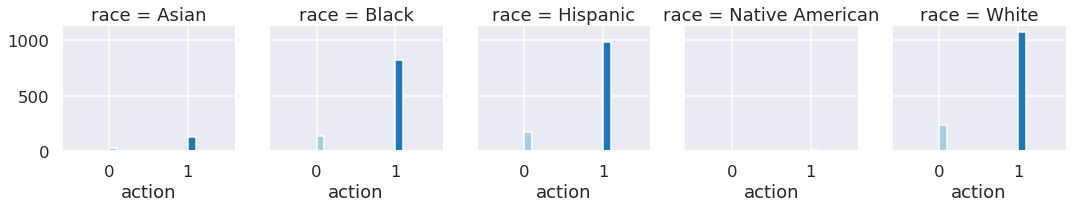

In [23]:
df4_facet = sns.FacetGrid(df4,col="race",hue='action',col_order=["Asian","Black","Hispanic","Native American","White"],size=3)
df4_facet = df4_facet.map(plt.hist, "action")

The White population records the highest count of stops incurred for this reason which falls in line with the fact that people who identify as White make up the largest portion of the San Diego population according to the U.S. Census Bureau. 

Text(0.5, 0, 'Action')

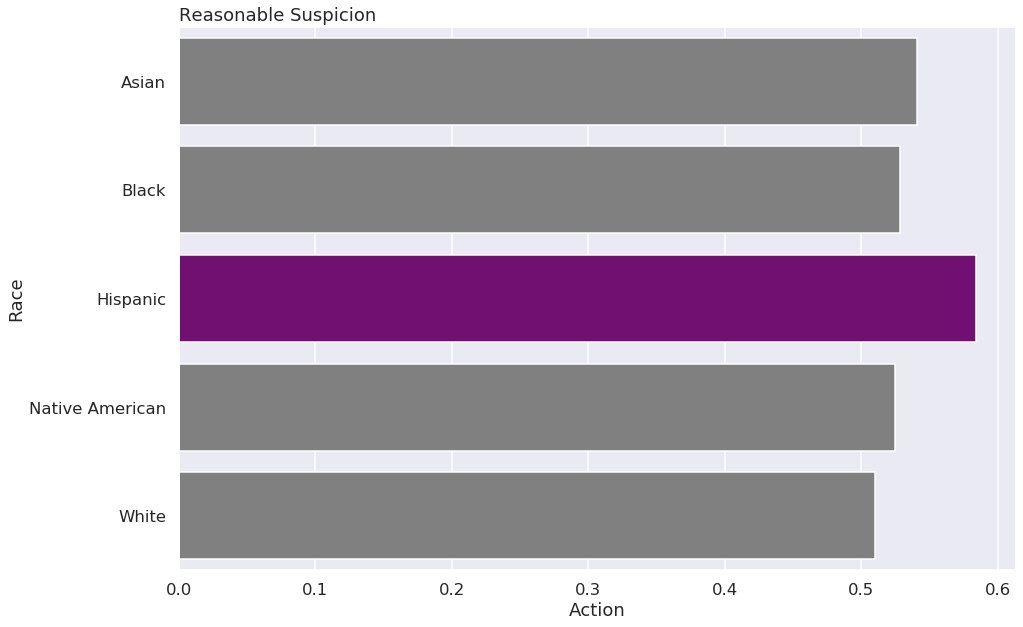

In [24]:
df5_prop = calculateRaceProportion(df5)

colorChoice = ['grey' if val < df5_prop['proportion'].max() else 'purple' for val in df5_prop['proportion'] ]
ax = sns.barplot(x='proportion', y='race', data=df5_prop, palette = colorChoice)

ax.set_title('Reasonable Suspicion', loc='left')
ax.set_ylabel('Race')
ax.set_xlabel('Action')

The Hispanic population reported the greatest percent of action taken due to a stop resulting from reasonable suspicion.

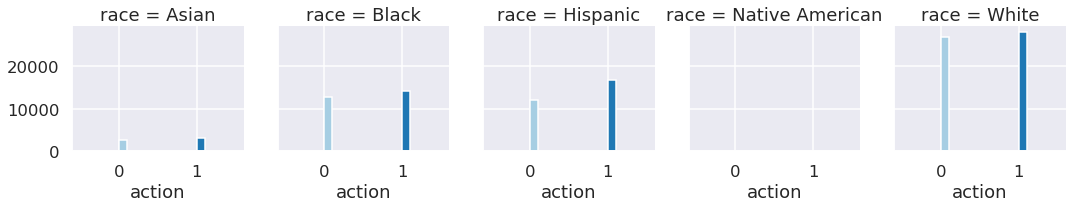

In [25]:
df5_facet = sns.FacetGrid(df5,col="race",hue='action',col_order=["Asian","Black","Hispanic","Native American","White"],size=3)
df5_facet = df5_facet.map(plt.hist, "action")


However as we can see in the facet grid, the white population dominates in the number of stops due to this reason. Yet while the number of people who had action taken against them and were perceived to be White is very similar to the number of people who were White and had no action taken against them, the same is not true for those who were Hispanic. We can see a visible difference between those that had action taken against them and those that didn't while looking at people who were perceived to be Hispanic.


Text(0.5, 0, 'Action')

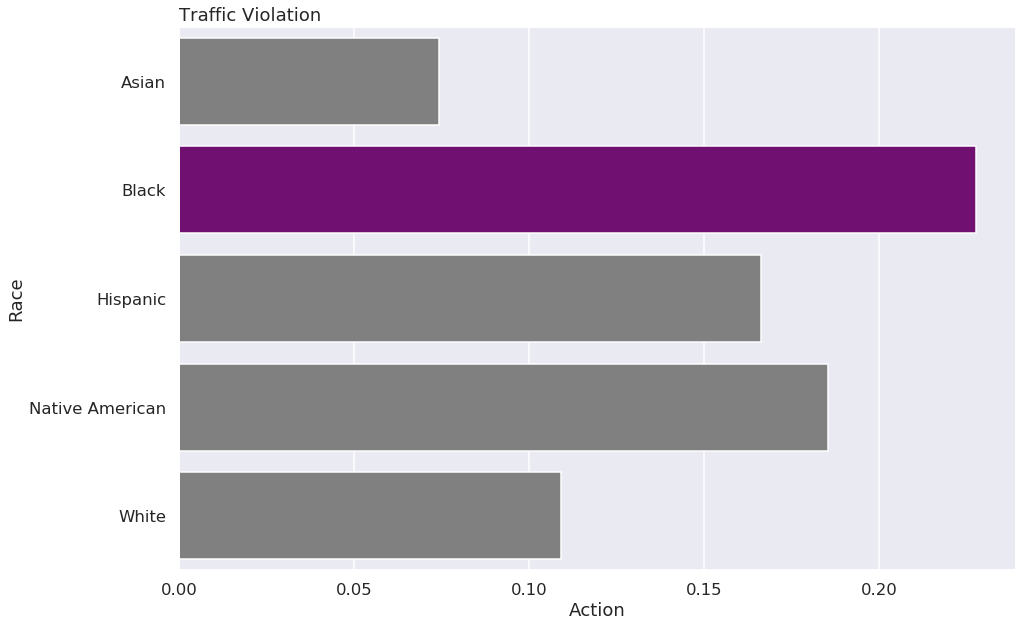

In [26]:
df6_prop = calculateRaceProportion(df6)

colorChoice = ['grey' if val < df6_prop['proportion'].max() else 'purple' for val in df6_prop['proportion'] ]
ax = sns.barplot(x='proportion', y='race', data=df6_prop, palette = colorChoice)

ax.set_title('Traffic Violation', loc='left')
ax.set_ylabel('Race')
ax.set_xlabel('Action')

The black population had the highest percent of action due to a stop conducted from a traffic violation.

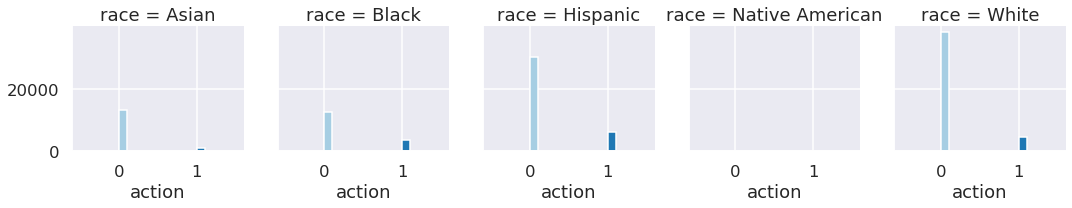

In [27]:
df6_facet = sns.FacetGrid(df6,col="race",hue='action',col_order=["Asian","Black","Hispanic","Native American","White"],size=3)
df6_facet = df6_facet.map(plt.hist, "action")

Moreover, although the white population was stopped more, they were also let go (nearly the most) with no action taken against them. 


While looking at the datagrame as a whole we saw that the Native American population as having the greatest ratio of action taken against them after being stopped. However, after looking closer we noticed that they make up less than 5% of the total sample population. Therefore, when dividing up the dataframe into separate reasons for getting stopped, the Black population had more action taken against them a majority of the time (3 out of 6 of the reasons). Conversely, the White population which makes up nearly 40% of our sample population and about 75% of San Diego's population never had the highest rate of action taken against them. 

# Data Analysis & Results

### Logistic Regression - By Race

Logistic regression is a predictive analysis that is used to describe the relationship between a categorical independent variable and a binary dependent variable. 
For our project, the categorical independent variable is race and the binary dependent variable is action (whether action is taken or not). 
Through our logistic regression analysis, we aim to investigate whether an individual’s race predicts whether action will be taken against them or not for different reasons for stop.

Testing out logistic regression which will help determine if race can accurately determine whether or not action will be taken against a detainee.

In [28]:
X = df[['race']]
y = df['action']

#to get numerical rep of races
X = pd.get_dummies(data=X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
print('Accuracy of logistic regression classifier on training set: {:.3f}'.format(model.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.637
Accuracy of logistic regression classifier on test set: 0.635


In [31]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78     30635
           1       0.00      0.00      0.00     17623

    accuracy                           0.63     48258
   macro avg       0.32      0.50      0.39     48258
weighted avg       0.40      0.63      0.49     48258



As we can see, the logistic regression doesn't have a high accuracy. However, this could be because we are looking at the dataframe as a whole. Let's try the logistic regression on one of our dataframes that focuses on a certain reason. We arbitrarily choose df6, traffic violation. 

In [32]:
X = df6[['race']]
y = df6['action']

#to get numerical rep of races
X = pd.get_dummies(data=X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
print('Accuracy of logistic regression classifier on training set: {:.3f}'.format(model.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.859
Accuracy of logistic regression classifier on test set: 0.857


In [35]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     18726
           1       0.00      0.00      0.00      3125

    accuracy                           0.86     21851
   macro avg       0.43      0.50      0.46     21851
weighted avg       0.73      0.86      0.79     21851



We can see that there is a massive improvement in the model's accuracy when we focus on one specific reason. Therefore, the reason for the stop may be a better predictor of action whether there would be action taken against a detainee rather than their race. To explore this possibility we used a heatmap.

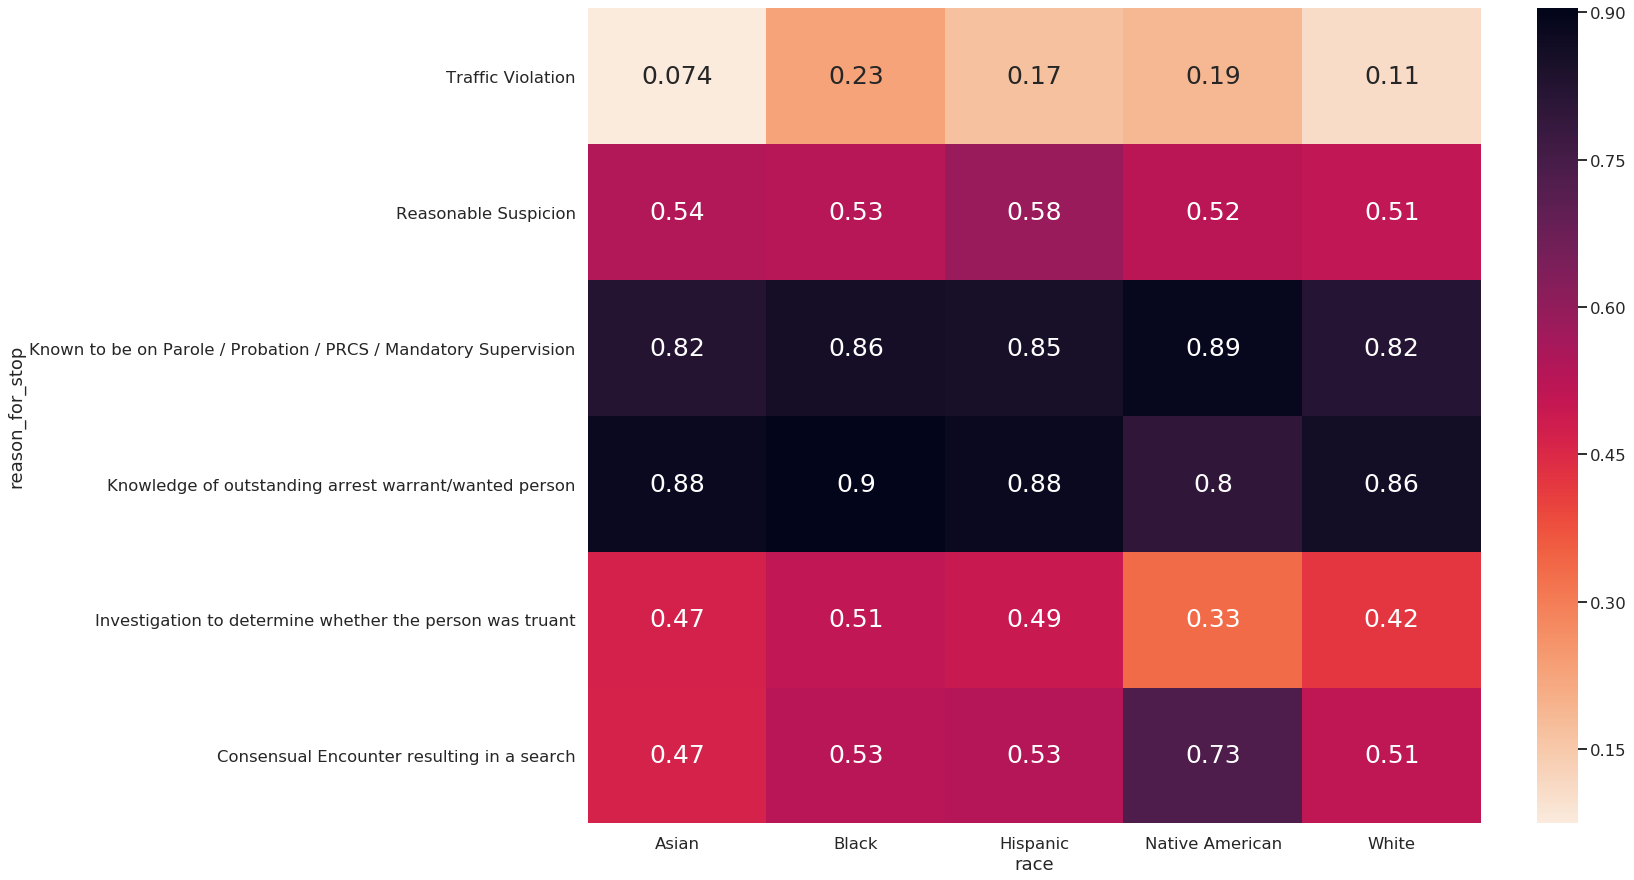

In [36]:
#Drop the two reasons for stop which contain less than 5% of our data
df.drop(df[df['reason_for_stop'] == 'Determine whether the student violated school policy'].index, inplace = True)
df.drop(df[df['reason_for_stop'] == 'Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7'].index, inplace = True)
plt.subplots(figsize = (20,15))
df_heatmap = df.pivot_table(values='action',index = 'reason_for_stop', columns='race')
ax = sns.heatmap(df_heatmap, annot = True, cmap = sns.cm.rocket_r,annot_kws={"size": 25})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 25)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 25)
bottom = 0
top = len(df.reason_for_stop.unique())
ax.set_ylim([bottom, top])
plt.show()

As we can see there's a major grouping within each reason, more so than a grouping within each race. Therefore we decided to visualize the relationship between action taken and each reason.

### Reason for Stop - Data Wrangling

In order to get an idea of the general trend of our data we decided to visualize the raw counts of each reason for stop broken into action and no action taken against them. 

Text(0.5, 0, 'Count')

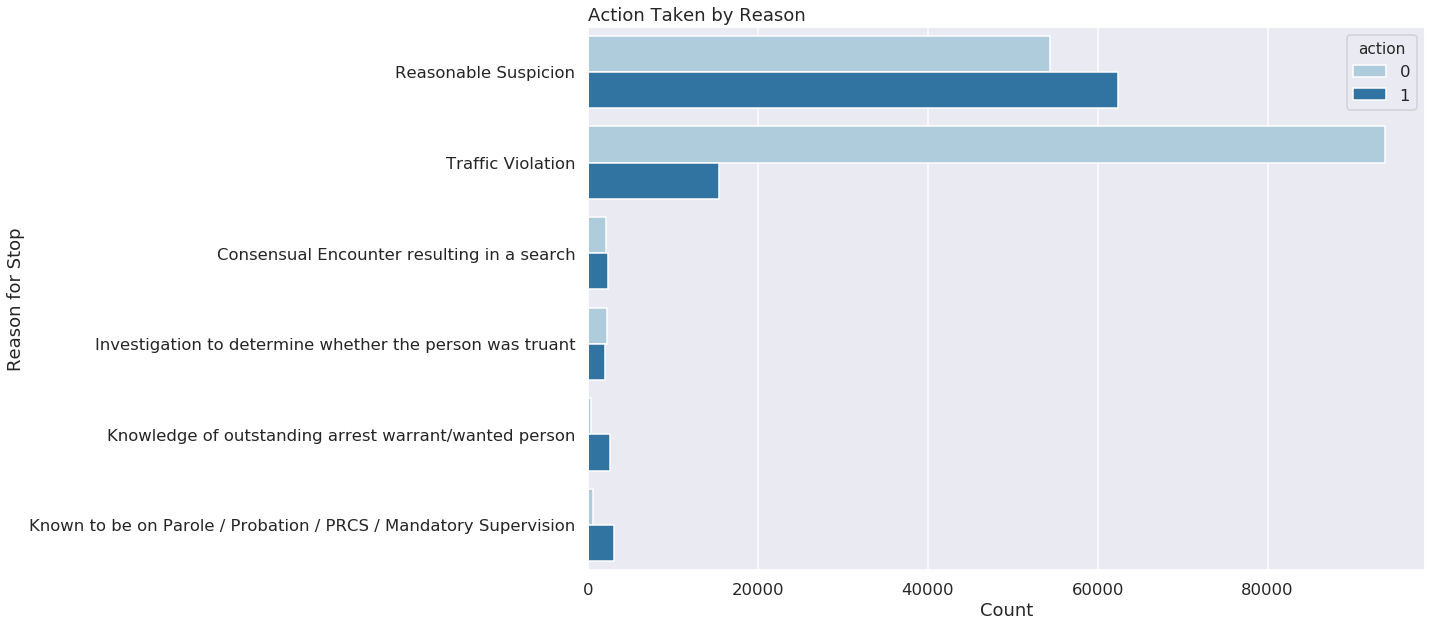

In [37]:
#plt.rcParams['figure.figsize'] = (15, 10)
sns.set_palette("Paired")
ax = sns.countplot(y='reason_for_stop', hue='action', data=df)
ax.set_title('Action Taken by Reason', loc = 'left')
ax.set_ylabel('Reason for Stop')
ax.set_xlabel('Count')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We can see that there is a massive difference between action taken and no action taken for traffic violation. This stands as an extremely interesting fact because taking a look at df6 which was grouped by race within the reason "Traffic Violation", we can see that detainees who were perceived to be Black overwhelmingly had more action taken against them. In fact, Black detainees had action taken against them 23% of the time while the smallest proportion, Asian detainees, only had action taken against them 7% of the time. To get a clearer picture, we decided to calculate the proportion of action taken against the number of stops made for that reason. 

In [38]:
#Calculate proportion of action taken against the total detainees stopped for that reason
def calculateReasonProportion(df):
    df_prop = pd.DataFrame(df.groupby('reason_for_stop')['action'].sum()/df['reason_for_stop'].value_counts())
    df_prop.reset_index(level=0, inplace=True)
    df_prop.columns = ['reason_for_stop', 'proportion']
    
    return df_prop

The above function calculates the proportion of action taken for stops within each reason for stop. 

Text(0.5, 0, 'Action')

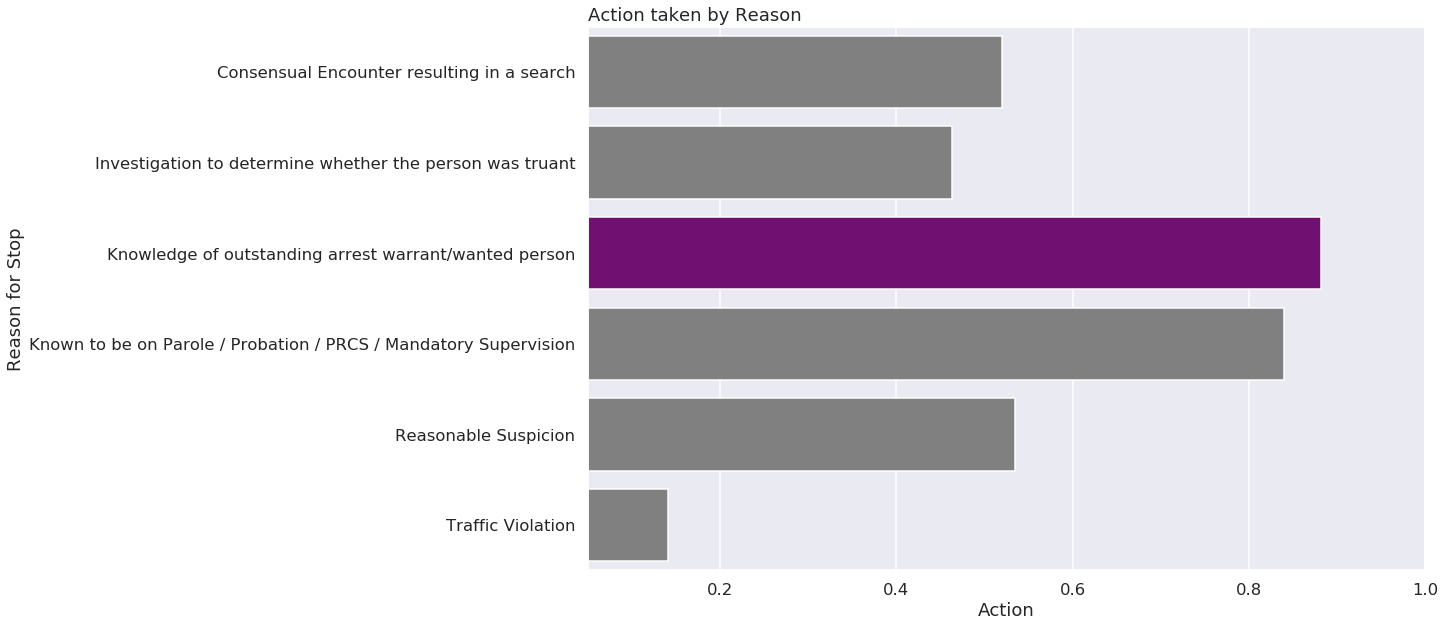

In [39]:
#create new dataframe with proportions of action taken vs no action for each race
df_reason_prop = calculateReasonProportion(df)

#set color choice to highlight the maximum proportion in purple
colorChoice = ['grey' if val < df_reason_prop['proportion'].max() else 'purple' for val in df_reason_prop['proportion'] ]
ax = sns.barplot(x='proportion', y='reason_for_stop', data=df_reason_prop, palette = colorChoice)
ax.set_xlim(0.05, 1)

ax.set_title('Action taken by Reason', loc='left')
ax.set_ylabel('Reason for Stop')
ax.set_xlabel('Action')

### Logistic Regression - By Reason

In [40]:
X = df[['reason_for_stop']]
y = df['action']

#to get numerical rep of races
X = pd.get_dummies(data=X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
print('Accuracy of logistic regression classifier on training set: {:.3f}'.format(model.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.690
Accuracy of logistic regression classifier on test set: 0.689


In [43]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72     30660
           1       0.55      0.80      0.65     17594

    accuracy                           0.69     48254
   macro avg       0.70      0.71      0.69     48254
weighted avg       0.74      0.69      0.69     48254



### Chi Square Test of Independence - Overall 

The Chi Square Test of Independence is a stastical technique used to assess the relationship between two categorical variables. This stastical test is relevant for our data since our independent variable, race, and dependent variable, action taken are both categorical variables. Based on the equation below, the dataset itself produces expected values for each subgroup. 

$E_{r,c}$ = ($n_{r}$ * $n_{c}$) / $n$

This equation simply means that in one subgroup (eg. Asians who had action taken) denoted by r,c , the expected value is the total of asians in the dataset * total amount of people who had action taken / the total number of people in the data set. 

In [44]:
df_crosstab = pd.crosstab(df['race'], df['action'], margins = True)
df_crosstab

action,0,1,All
race,,,
Asian,16248,4808,21056
Black,26194,20327,46521
Hispanic,43591,25867,69458
Native American,278,234,512
White,67276,36447,103723
All,153587,87683,241270


This crosstable helps us see how many people are in each subgroup. The expected value of an Asian who had action taken against them is (21,060 * 153,594)/241,290. After all the expected values for the different subgroups are calculated, then the chi square test is performed and is described by the equation shown below.

$X^{2}$= Σ [$(O_{r,c}$ - $E_{r,c})^{2}$/$E_{r,c}$]


Essentially, this equation will take the observed amount of people in the subgroups and subtract those values with the expected values for each respective subgroup denoted by r, the row value, and c, the column value. This value is squared and divided again by the expected value. After each value is calculated, these values are all summed up resulting in the final chi square test-statistic as shown below. In addition, we were also able to calculate the p-value.

In [45]:
chi2, p, dof, ex = stats.chi2_contingency(df_crosstab, correction=False)
print(chi2, p)

2856.1975076422236 0.0


The p-value indicates the probability that a chi-square statistic of about 2,854 is hard to achieve by chance with four degrees of freedom, since p<0.05. Even though our p-value is computed as 0, there is a possibily due to chance or by rounding that our p-value is not 0, but a very minute value, which is why we are going to state our p-value as p < 0.001. With this p-value, we can evaluate that the results are highly significant and that there is a relationship between race and action taken by law enforcement. However, do these results reflect the entire dataset or are they  based on a specific reason or a couple of reasons? We performed a chi-square test to each dataset by reason to see if the results yielded were similar.

#### Reason: Consensual Encounter resulting in a search

In [46]:
df_crosstab = pd.crosstab(df1['race'], df1['action'], margins = True)
df_crosstab

action,0,1,All
race,,,
Asian,157,137,294
Black,420,465,885
Hispanic,656,749,1405
Native American,4,11,15
White,909,964,1873
All,2146,2326,4472


In [47]:
chi2, p, dof, ex = stats.chi2_contingency(df_crosstab, correction=False)
print(chi2, p)

7.453268952462552 0.6820717712014879


In the case of consensul encounter resulting in a search, we see that the p-value is greater than 0.05, meaning that race is not able to predict action taken from this particular reason of a police stop. 

#### Reason: Investigation to determine whether the person was truant

In [48]:
df_crosstab = pd.crosstab(df2['race'], df2['action'], margins = True)
df_crosstab

action,0,1,All
race,,,
Asian,179,158,337
Black,461,479,940
Hispanic,550,536,1086
Native American,6,3,9
White,1102,808,1910
All,2298,1984,4282


In [49]:
chi2, p, dof, ex = stats.chi2_contingency(df_crosstab, correction=False)
print(chi2, p)

25.19802421220477 0.0049825275893376165


The p-value here, 0.004 is statistically significant implying that the reason of determining whether the person was truant can predict action taken based on race.

####  Reason: Knowledge of outstanding arrest warrant/wanted person

In [50]:
df_crosstab = pd.crosstab(df3['race'], df3['action'], margins = True)
df_crosstab

action,0,1,All
race,,,
Asian,19,145,164
Black,74,700,774
Hispanic,96,738,834
Native American,2,8,10
White,150,958,1108
All,341,2549,2890


In [51]:
chi2, p, dof, ex = stats.chi2_contingency(df_crosstab, correction=False)
print(chi2, p)

7.665304399220867 0.6614922147748574


Knowledge of outstanding arrest warrant or wanted person is not statistically significant as the p-value is not lower than 0.05, meaning that this reason is not sufficient to suggest that race predicts action taken by enoforcement. 

#### Reason: Known to be on Parole / Probation / PRCS / Mandatory Supervision

In [52]:
df_crosstab = pd.crosstab(df4['race'], df4['action'], margins = True)
df_crosstab

action,0,1,All
race,,,
Asian,27,127,154
Black,136,820,956
Hispanic,173,985,1158
Native American,1,8,9
White,235,1073,1308
All,572,3013,3585


In [53]:
chi2, p, dof, ex = stats.chi2_contingency(df_crosstab, correction=False)
print(chi2, p)

7.411201088308019 0.6861378461466044


This reason has a similar p-value to the reason stated above, and again it is not a great indicator and not staistically significant to say if race has an effect on action taken. 

#### Reason: Reasonable Suspicion

In [54]:
df_crosstab = pd.crosstab(df5['race'], df5['action'], margins = True)
df_crosstab

action,0,1,All
race,,,
Asian,2702,3185,5887
Black,12678,14199,26877
Hispanic,11993,16847,28840
Native American,164,181,345
White,26855,27986,54841
All,54392,62398,116790


In [55]:
chi2, p, dof, ex = stats.chi2_contingency(df_crosstab, correction=False)
print(chi2, p)

419.991287773619 5.211854108907382e-84


For reasonably suspicion, the p-value once again is stasitically lower than 0.05. This reason alone can suggest that race has an effect on action taken.

#### Traffic Violation

In [56]:
df_crosstab = pd.crosstab(df6['race'], df6['action'], margins = True)
df_crosstab

action,0,1,All
race,,,
Asian,13164,1056,14220
Black,12425,3664,16089
Hispanic,30123,6012,36135
Native American,101,23,124
White,38025,4658,42683
All,93838,15413,109251


In [57]:
chi2, p, dof, ex = stats.chi2_contingency(df_crosstab, correction=False)
print(chi2, p)

2073.3094090816853 0.0


Out of all, traffic violation has the lowest p-value, which might be close to the overall p-value, suggesting that it is a reason to heavily influence action taken by the race of a person. 

# Ethics & Privacy

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; According to the datasets we have obtained by the city of San Diego, we have the proper consent to use the data provided for our own research purposes. In most cases and to abide by the law, the police are required to report and record such data when arresting people. Since it is mandated by the government, verbal consent is not required for data collection. Furthermore, these data sets are provided to the public anonymously and are made available by the city of San Diego with the intention of public use, meaning that we do not foresee any potential issues when using this data. If there are unaccounted privacy issues, we are willing to drop any data that will violate the terms of data privacy. However, these issues are unlikely considering the fact that we have acquired this data from the city of San Diego.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In order to ensure there are no potential biases in our dataset collection and analysis, we have identified the different areas where our data could possibly be affected by prior affiliation and addressed them separately. None of our team members are associated or concerned with San Diego law enforcement, so we have no stake in any of the results. This addresses the issue of team bias as a whole. In terms of data collection, all data is collected from online public databases made available by the city of San Diego. The data we use is from a dataset where every stop made by law enforcement in the past year is recorded, which addresses the issue of sampling bias. We plan to use only the data made available to us online, and there is no personal handpicking of races for specific analysis. There is possible human bias, or racial discrimination which we explored through analysis in this project. By analyzing this racial discrimination, we are examining that our data collection process is transparent and free from bias.
Moving forward to algorithmic analysis, we maintain an objective outlook and analyze all data at hand. We use the labels, variables and categories as used by the city of San Diego to avoid affecting the analysis with our own bias. We did not use any previous data to influence our analysis thereby ensuring our analysis is not affected by any prior discrimination towards certain races. Lastly, to keep ourselves accountable, we constantly monitor the data and use only the datasets that are made available to us per the San Diego website’s updates. At each step of the project, we revisit this checklist and ensure that we are ethical and bias-free. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Although we made sure that all the biases and privacy issues are cleared, there is a possibility that we have not accounted for the consequences that will ensue after coming to a conclusion. One possible consequence can be how the public reacts to our results. For example, our results show that one minority race is more likely to be arrested than the other respective races, so we do not intend to negatively portray any group whether it be the police or people of that specific race. In order to limit these consequences, biases, and possible issues with data privacy, we tried our best to be completely transparent when communicating our results. We did our best in delivering results with as much detail as possible, so that people curious about our findings will understand that our conclusion and analysis is void of any external and personal factors.


# Conclusion & Discussion

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The focus of our research was to analyze if racial discrimination by law enforcement existed in San Diego, and how race affected, or did not affect, the outcome of a police stop. We used RIPA police stop data from the City of San Diego to carry out analysis. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We first used logistic regression to determine whether race was a predictor for the outcome of the police stop. The accuracy of this model was 64%, which suggested that perhaps race was not a strong predictor of the outcome of a police stop. Hence, we carried out secondary analysis, still using logistic regression, to determine whether race predicted the outcome of a police stop within the scope of a particular reason for stop, in this case a traffic violation. Here, we saw a significant increase in the model’s accuracy, jumping to 86%. This meant that for traffic violations, Black individuals were more likely to have action taken against them. We then explored reason as a better predictor of whether action would be taken as a detainee. However, the logistic regression model based on the reason for stop only had a minor improvement in accuracy (~69%). 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To further analyze whether the combination of the race of a detainee and the reason why they were stopped was related to whether action would be taken, we performed a Chi Square Test of Independence on each of the reasons for police stop to see if race predicted outcome. We found that for certain reasons, like traffic violations and investigation to determine whether the person was truant, race predicted outcome. For other reasons, however, race did not predict outcome. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Despite these conclusions, our research faced a few limitations. Our user-level algorithm cannot determine the “why” behind a certain race having more action taken against them rather it can only state that there was a certain race with more action taken against them and which race it was. Additionally, the dataset we used recorded data on the race of a detainee to be as perceived by the officer. As a result, there is a possibility the officer incorrectly determined the race of a detainee. Finally, our research only takes into account the reason for the stop, result of the stop, and the race of the person stopped. We don't take into consideration other variables within a stop, for instance, the amount of time the stop took which could imply other altercations within the stop. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our research is of particular interest in American society today given the recent murders of George Floyd, Breonna Taylor, and several others at the hands of police officers. Such acts of police brutality have prompted the rise of the Black Lives Matter movement, with demands for defunding and abolishing the police. Data is a powerful tool that can be used to either back, or debunk, such demands. Our work is a stepping stone in this direction, as part of a larger national effort to critically examine American institutions and protect Black lives.

# Team Contributions

- Susanna Anil: Worked on data cleaning and annotations
- Sahithi Chimmula: Worked on Chi Square analysis
- Reshma Karthikeyan: Worked on data cleaning, annotations, analysis
- Shagun Khare: Worked on overview, annotations, conclusion
- Pooja Pathak: Worked on logistic regression model and visualizations